<a href="https://colab.research.google.com/github/ommathur54/Python/blob/master/mnist_dl_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mnist handwritten dataset 
# multiclass class classification 

import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt 




In [2]:
#geting dataet from keras
mnist = tf.keras.datasets.mnist


In [3]:
#dataset is present as tuple format and divided in 2 part i.e train and test
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train_full.shape)

print(y_train_full.shape)

(60000, 28, 28)
(60000,)


In [5]:
print(x_test.shape)
print(y_test.shape)

print(x_train_full)

(10000, 28, 28)
(10000,)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [6]:
print(x_train_full.dtype)

print(y_train_full.dtype)

uint8
uint8


In [7]:
#because uint8 is 2**8 and taht means 0 to 255 , if we divide by 255 than the we do scale the value between 0 and 1 and process become faster to get reult faster 
x_valid, x_train = x_train_full[:5000]/255. , x_train_full[5000:]/255.

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


(-0.5, 27.5, 27.5, -0.5)

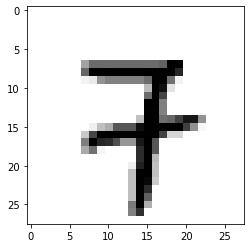

In [8]:

plt.imshow(x_train[14],cmap="binary")
plt.axis("on")


(-0.5, 27.5, 27.5, -0.5)

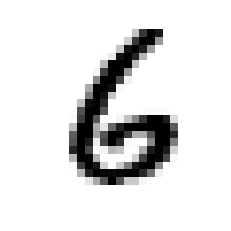

In [9]:
plt.imshow(x_train[1000],cmap="binary")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

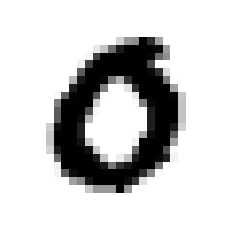

In [10]:
plt.imshow(x_train[3000],cmap="binary")
plt.axis("off")

In [11]:
#creating list of layers 
l = [tf.keras.layers.Flatten(input_shape = [28,28], name ="inputlayer"),
tf.keras.layers.Dense(300,activation = "relu", name = "hiddenlayer1"),
tf.keras.layers.Dense(100,activation = "relu", name = "hiddenlayer2"),
tf.keras.layers.Dense(10,activation = "softmax", name = "hiddenlayer3")]


In [12]:
model_clf = tf.keras.models.Sequential(l)


model_clf.layers


model_clf.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenlayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
hiddenlayer3 (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
hiddenlayer1 = model_clf.layers[1]
print(hiddenlayer1.name)


model_clf.get_layer(hiddenlayer1.name) is hiddenlayer1

type(hiddenlayer1.get_weights())


print(hiddenlayer1.get_weights())

hiddenlayer1
[array([[-0.0630106 ,  0.03999849, -0.02709393, ...,  0.00676788,
         0.04192998, -0.01668809],
       [-0.00412957, -0.0418191 ,  0.01856385, ...,  0.05900136,
        -0.04830823,  0.00251622],
       [-0.01398417, -0.05813729,  0.06538497, ...,  0.04801791,
         0.02162754, -0.04032048],
       ...,
       [-0.02619631, -0.01744651,  0.0277764 , ...,  0.06880848,
         0.01170956,  0.00548376],
       [-0.04276334, -0.01944996,  0.0381297 , ..., -0.01746858,
        -0.07040541, -0.00237769],
       [-0.05144059, -0.05746675,  0.05727385, ..., -0.02292011,
        -0.02923817, -0.0373796 ]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [14]:
weight, biases = hiddenlayer1.get_weights()

print("shape\n", weight.shape)
print(weight)

print("shape\n", biases.shape)
print(biases)

shape
 (784, 300)
[[-0.0630106   0.03999849 -0.02709393 ...  0.00676788  0.04192998
  -0.01668809]
 [-0.00412957 -0.0418191   0.01856385 ...  0.05900136 -0.04830823
   0.00251622]
 [-0.01398417 -0.05813729  0.06538497 ...  0.04801791  0.02162754
  -0.04032048]
 ...
 [-0.02619631 -0.01744651  0.0277764  ...  0.06880848  0.01170956
   0.00548376]
 [-0.04276334 -0.01944996  0.0381297  ... -0.01746858 -0.07040541
  -0.00237769]
 [-0.05144059 -0.05746675  0.05727385 ... -0.02292011 -0.02923817
  -0.0373796 ]]
shape
 (300,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
loss_function = "sparse_categorical_crossentropy" #use => tf.losses.sparse_categorical_crossentropy 


optimize = "SGD" # we can use custom learing rate => tf.keras.optimizer.SGD(0.02)

metrics = ["accuracy"]


model_clf.compile(loss= loss_function, optimizer = optimize, metrics = metrics)

In [ ]:

Epochs = 30

validation_set = (x_valid, y_valid)

history = model_clf.fit(x_train, y_train, epochs= Epochs, validation_data = validation_set)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 1.0132 - accuracy: 0.7258 - val_loss: 0.3054 - val_accuracy: 0.9156
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9143 - val_loss: 0.2360 - val_accuracy: 0.9348
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2381 - accuracy: 0.9314 - val_loss: 0.1993 - val_accuracy: 0.9442
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2054 - accuracy: 0.9419 - val_loss: 0.1722 - val_accuracy: 0.9512
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1769 - accuracy: 0.9493 - val_loss: 0.1536 - val_accuracy: 0.9568
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1603 - accuracy: 0.9543 - val_loss: 0.1380 - val_accuracy: 0.9614
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1391 - accuracy: 0.9607 - val_loss: 0.1299 - val_accuracy:

In [ ]:
#creating model 
import time 
import os 


def saveModel_path(model_dir = "_saved_models"):
	os.makedirs(model_dir, exist_ok = True)
	filename = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
	model_path = os.path.join(model_dir, filename)
	print(f"your model will be saved at the followin location\n{model_path}")
	return(model_path)




In [ ]:
unique_path = model_clf.save(saveModel_path())

your model will be saved at the followin location
_saved_models/Model_2021_06_14_12_00_48_.h5
